In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp
%matplotlib inline

In [2]:
class SIR(object):
    def __init__(self, RO, ini_s, ini_i, ini_r, t_start=0, t_end=50):
        self.RO = RO
        self.ini_s = ini_s
        self.ini_i = ini_i
        self.ini_r = ini_r
        self.n_total = self.ini_s + self.ini_i + self.ini_r
        self.i_period = 2
        self.gamma = 1.0 / self.i_period
        self.beta = self.RO * self.gamma
        self.n_ini = [ini_s, ini_i, ini_r]
        self.t_span = [t_start, t_end]
        
    @staticmethod
    def equation_of_system(t, nt, beta, gamma, n_total):
        ds = - beta * nt[0] * nt[1] / n_total
        di = beta * nt[0] * nt[1] / n_total - gamma * nt[1]
        dr = gamma * nt[1]
        dn = [ds, di, dr]
        return dn
    
    def run(self):
        sol = solve_ivp(self.equation_of_system, self.t_span, 
                        self.n_ini, method='RK45',
                        args=(self.beta, self.gamma, self.n_total),
                        dense_output=True)
        return sol

In [28]:
sir = SIR(5, 9999, 1, 0)

In [29]:
solution = sir.run()

In [30]:
print(solution)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 200
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fb9235c2340>
   status: 0
  success: True
        t: array([0.00000000e+00, 2.82699197e-03, 3.10969117e-02, 3.13796109e-01,
       8.32246249e-01, 1.47583348e+00, 2.18179896e+00, 2.92182965e+00,
       3.69839123e+00, 4.60377803e+00, 5.52197471e+00, 6.49672841e+00,
       7.44587167e+00, 8.84730918e+00, 1.08785081e+01, 1.29097071e+01,
       1.49456210e+01, 1.69699437e+01, 1.89906378e+01, 2.10097474e+01,
       2.30282600e+01, 2.50465960e+01, 2.70650043e+01, 2.90838093e+01,
       3.11037403e+01, 3.31266694e+01, 3.51574649e+01, 3.72085501e+01,
       3.93099912e+01, 4.15266737e+01, 4.39740627e+01, 4.68192563e+01,
       5.00000000e+01])
 t_events: None
        y: array([[9.99900000e+03, 9.99899291e+03, 9.99891980e+03, 9.99790886e+03,
        9.99364970e+03, 9.97638632e+03, 9.90313048e+03, 9.58882952e+

In [31]:
t = np.linspace(0, 20, 50)

In [32]:
dense_sol = solution.sol(t)

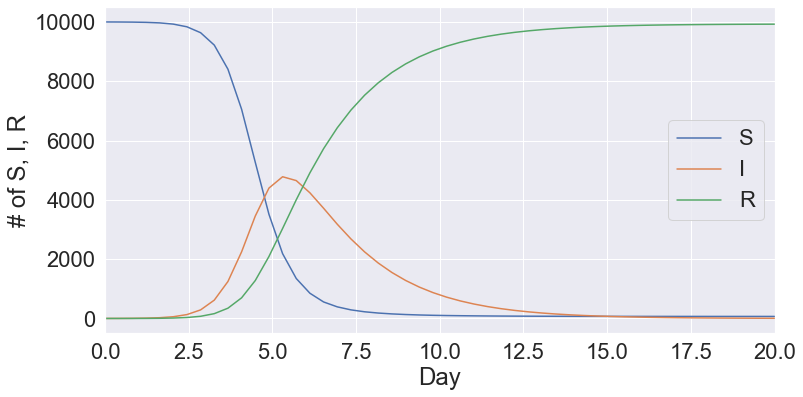

In [33]:
plt.figure(figsize=(12,6))
sns.set(font_scale=2)
label_list = ['S', 'I', 'R']
for i in range(3):
    plt.plot(t,dense_sol[i], label=label_list[i])
plt.xlabel('Day')
plt.ylabel('# of S, I, R')
plt.xlim([0, 20])
plt.legend()